In [73]:
# main.ipynb - Mobile Banking App Review Analysis
# Orchestrates scraping, analysis, and preprocessing of Ethiopian bank app reviews

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from datetime import datetime
import importlib

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# notebooks/main.ipynb

# Import sys and set path to reach src directory
import sys
import os
sys.path.append(os.path.abspath("../src"))

import scraper 
from src import preprocessor
 # This is src/scraper.py

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("Set2")

## 🏦 Ethiopian Mobile Banking App Review Analysis
This notebook manages the entire workflow for analyzing mobile banking app reviews from the Google Play Store:

- Scraping reviews using `scraper.py`
- Conducting exploratory data analysis on raw data
- Preprocessing data with `preprocessor.py`
- Analyzing the cleaned dataset

## 📱 Step 1: Scrape App Reviews

In [74]:

from datetime import datetime

# App IDs for Ethiopian banks
app_ids = {
        "com.combanketh.mobilebanking": "Commercial Bank of Ethiopia",
        "com.boa.boaMobileBanking": "Bank of Abyssinia",
        "com.dashen.dashensuperapp": "Dashen Bank"
    }

print("🔍 Starting review scraping process...\n")

for app_id, bank_name in app_ids.items():
    print(f"➡️ Scraping reviews for {bank_name}...")
    df = scraper.scrape_app_reviews(app_id)

    if not df.empty:
        print(f"✅ Retrieved {len(df)} reviews for {bank_name}")
        # Save DataFrame to CSV
        safe_bank_name = bank_name.lower().replace(" ", "_")
        today = datetime.today().strftime("%Y%m%d")
        filename = f"../data/raw/{safe_bank_name}_reviews_{today}.csv"
        df.to_csv(filename, index=False)
        print(f"💾 Saved reviews to {filename}")
    else:
        print(f"❌ Failed to retrieve reviews for {bank_name}")

print("\n🎉 Scraping complete!")


🔍 Starting review scraping process...

➡️ Scraping reviews for Commercial Bank of Ethiopia...
Scraping reviews for Commercial Bank of Ethiopia...
Successfully scraped 500 reviews for Commercial Bank of Ethiopia
✅ Retrieved 500 reviews for Commercial Bank of Ethiopia
💾 Saved reviews to ../data/raw/commercial_bank_of_ethiopia_reviews_20250610.csv
➡️ Scraping reviews for Bank of Abyssinia...
Scraping reviews for BoA Mobile...
Successfully scraped 500 reviews for BoA Mobile
✅ Retrieved 500 reviews for Bank of Abyssinia
💾 Saved reviews to ../data/raw/bank_of_abyssinia_reviews_20250610.csv
➡️ Scraping reviews for Dashen Bank...
Scraping reviews for Dashen Bank...
Successfully scraped 450 reviews for Dashen Bank
✅ Retrieved 450 reviews for Dashen Bank
💾 Saved reviews to ../data/raw/dashen_bank_reviews_20250610.csv

🎉 Scraping complete!


## 📊 Step 2: Exploratory Data Analysis on Raw Data

In [75]:
# Load all raw CSV files
raw_files = glob.glob("../data/raw/*.csv")
raw_dfs = []

for file in raw_files:
    bank_name = os.path.basename(file).split('_')[0].replace('_', ' ').title()
    df = pd.read_csv(file)
    df['file_source'] = file
    raw_dfs.append(df)

if raw_dfs:
    raw_data = pd.concat(raw_dfs, ignore_index=True)
    print(f"📊 Loaded {len(raw_data)} total reviews from {len(raw_dfs)} bank apps")
else:
    print("❌ No raw data found. Please run the scraper first.")
    raw_data = pd.DataFrame()

📊 Loaded 1450 total reviews from 3 bank apps


### 📋 Basic Structural Analysis

In [76]:
if not raw_data.empty:
    print("\n📋 Raw Data Overview:")
    display(raw_data.head())
    
    print("\n🔢 Data Shape:", raw_data.shape)
    print("\n📊 Data Types:")
    display(raw_data.dtypes)
    
    print("\n📊 Basic Statistics:")
    display(raw_data.describe(include='all'))


📋 Raw Data Overview:


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,bank,source,file_source
0,ec7606a9-f681-4662-89b9-7b253d145629,Mr Sanchez,https://play-lh.googleusercontent.com/a-/ALV-U...,"I have a fitayah account, a type of interest f...",1,934,24.02.07,2024-02-18 09:28:12,"Dear customer, We are sorry for the inconvenie...",2024-02-22 15:53:42,24.02.07,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250610...
1,daec843b-9c90-4779-9aa3-630128589864,Dagim Sisay,https://play-lh.googleusercontent.com/a-/ALV-U...,Can you please just make it functional. I don'...,1,365,24.02.07,2024-04-15 12:30:58,NaN,NaN,24.02.07,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250610...
2,07b87145-49d8-4394-bbf7-73e43dec9ac2,Kirubel Getachew,https://play-lh.googleusercontent.com/a-/ALV-U...,Developers/ the company takes too long to upda...,2,182,24.04.26,2024-05-03 10:28:07,NaN,NaN,24.04.26,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250610...
3,2e219268-96fd-400c-8632-0b0d1044f487,Natty Solomon,https://play-lh.googleusercontent.com/a-/ALV-U...,This app is a joke. It crashes more than it wo...,1,53,25.05.03,2025-05-21 13:49:15,NaN,NaN,25.05.03,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250610...
4,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,1,NaN,2025-06-03 16:21:34,NaN,NaN,NaN,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250610...



🔢 Data Shape: (1450, 14)

📊 Data Types:


reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
bank                    object
source                  object
file_source             object
dtype: object


📊 Basic Statistics:


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,bank,source,file_source
count,1450,1450,1450,1450,1450.00000,1450.000000,1189,1450,22,22,1189,1450,1450,1450
unique,1450,1412,1423,1406,NaN,NaN,37,1450,15,22,37,3,1,3
top,ec7606a9-f681-4662-89b9-7b253d145629,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,NaN,NaN,5.1.0,2024-02-18 09:28:12,"Dear customer, We are sorry for the inconvenie...",2024-02-22 15:53:42,5.1.0,BoA Mobile,Google Play,../data/raw\bank_of_abyssinia_reviews_20250610...
freq,1,6,6,11,NaN,NaN,114,1,6,1,114,500,1450,500
mean,NaN,NaN,NaN,NaN,3.09931,40.802759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.76534,174.371524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.00000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.00000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🔍 Missing and Null Values


🔍 Missing Values Analysis:


,Missing Values,Percentage
reviewId,0,0.000000
userName,0,0.000000
userImage,0,0.000000
content,0,0.000000
score,0,0.000000
thumbsUpCount,0,0.000000
reviewCreatedVersion,261,18.000000
at,0,0.000000
replyContent,1428,98.482759
repliedAt,1428,98.482759


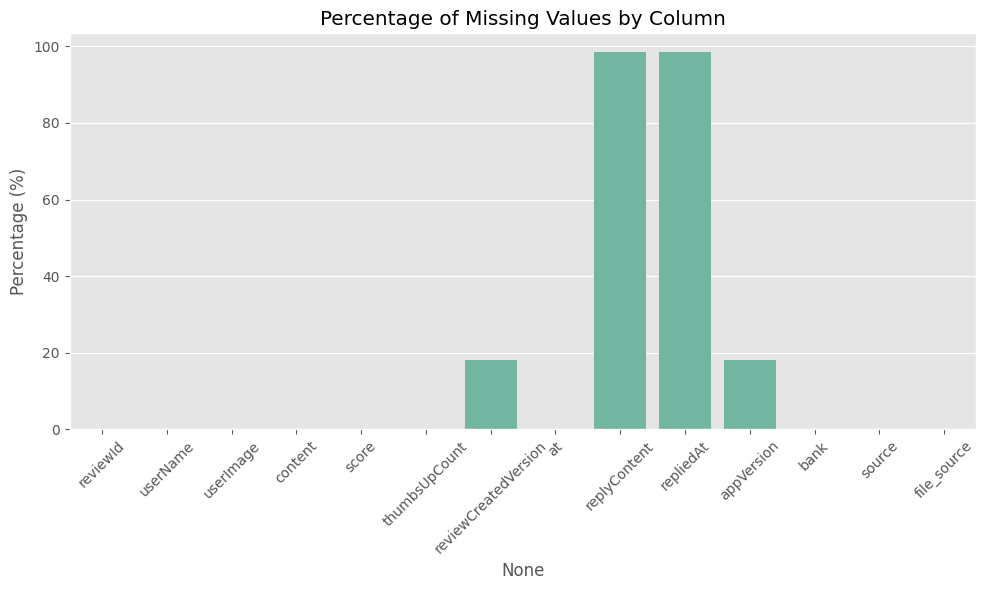

In [77]:
if not raw_data.empty:
    # Calculate missing values
    missing_data = raw_data.isnull().sum()
    missing_percentage = (missing_data / len(raw_data)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_data,
        'Percentage': missing_percentage
    })
    
    print("\n🔍 Missing Values Analysis:")
    display(missing_df)
    
    # Visualize missing data
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y='Percentage', data=missing_df)
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

### 🔄 Duplicates Check

In [81]:
if not raw_data.empty:
    # Check for duplicates
    duplicates = raw_data.duplicated().sum()
    print(f"\n🔄 Duplicate Rows: {duplicates} ({duplicates/len(raw_data)*100:.2f}%)")
    
    # Check for duplicates based on review text only
    text_duplicates = raw_data.duplicated(subset=['content']).sum()
    print(f"🔄 Duplicate Reviews (by text only): {text_duplicates} ({text_duplicates/len(raw_data)*100:.2f}%)")


🔄 Duplicate Rows: 0 (0.00%)
🔄 Duplicate Reviews (by text only): 44 (3.03%)


### 📏 Length of Reviews

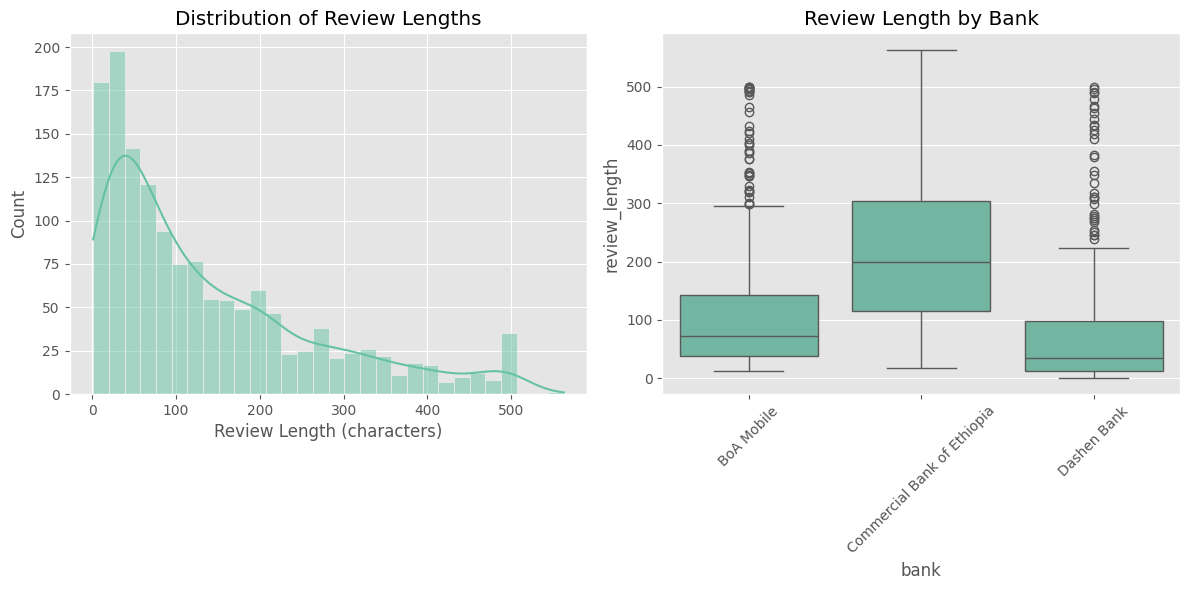


📏 Review Length Statistics:


,count,mean,std,min,25%,50%,75%,max
bank,,,,,,,,
BoA Mobile,500.0,111.652000,109.068064,12.0,38.00,73.0,142.25,500.0
Commercial Bank of Ethiopia,500.0,218.282000,126.103428,17.0,115.50,199.0,303.25,563.0
Dashen Bank,450.0,75.617778,99.693967,1.0,12.25,35.0,98.75,500.0


In [83]:
if not raw_data.empty:
    # Calculate review length
    raw_data['review_length'] = raw_data['content'].fillna("").apply(len)
    
    # Plot distribution of review lengths
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(raw_data['review_length'], bins=30, kde=True)
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Review Length (characters)')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='bank', y='review_length', data=raw_data)
    plt.title('Review Length by Bank')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n📏 Review Length Statistics:")
    display(raw_data.groupby('bank')['review_length'].describe())

### ⭐ Ratings Distribution

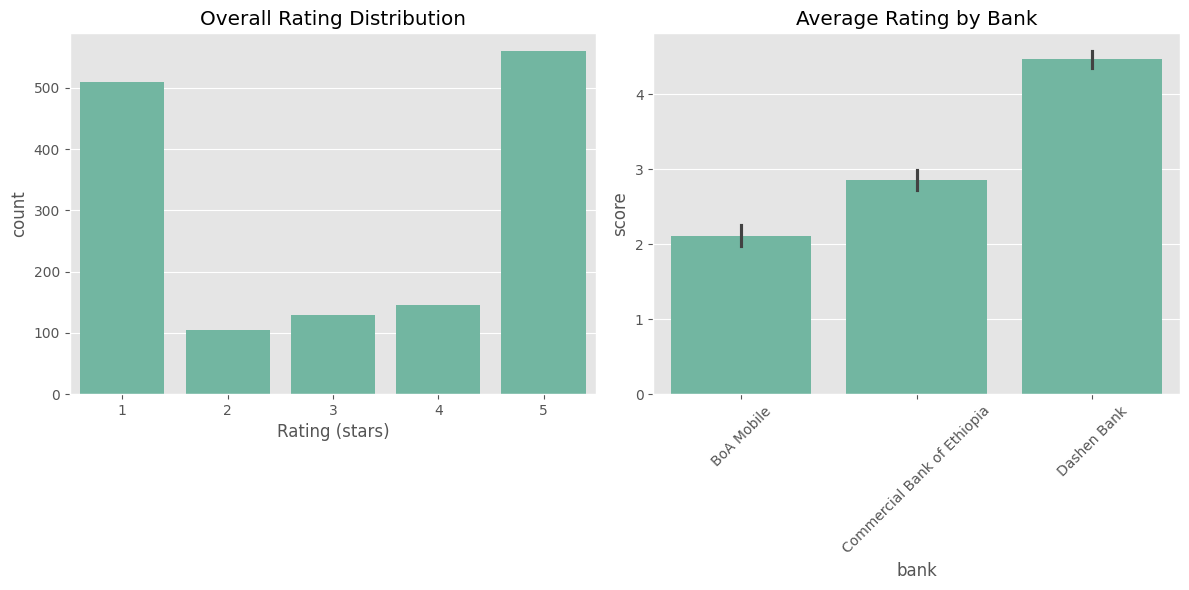


⭐ Rating Statistics by Bank:


,Total Reviews,Average Rating,std,min,max
bank,,,,,
BoA Mobile,500,2.112000,1.606430,1,5
Commercial Bank of Ethiopia,500,2.852000,1.557867,1,5
Dashen Bank,450,4.471111,1.205153,1,5


In [85]:
if not raw_data.empty:
    # Plot ratings distribution
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x='score', data=raw_data)
    plt.title('Overall Rating Distribution')
    plt.xlabel('Rating (stars)')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='bank', y='score', data=raw_data, estimator=np.mean)
    plt.title('Average Rating by Bank')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Detailed rating statistics by bank
    rating_stats = raw_data.groupby('bank')['score'].agg(['count', 'mean', 'std', 'min', 'max'])
    rating_stats = rating_stats.rename(columns={'count': 'Total Reviews', 'mean': 'Average Rating'})
    
    print("\n⭐ Rating Statistics by Bank:")
    display(rating_stats)

### 🏦 Reviews per Bank

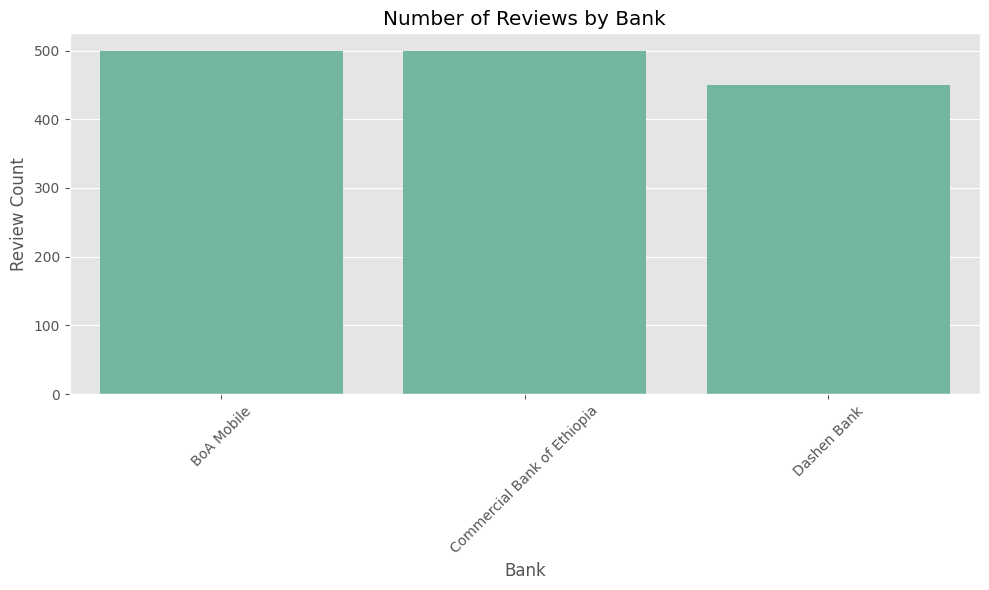


🏦 Reviews per Bank:


,Bank,Review Count
0,BoA Mobile,500
1,Commercial Bank of Ethiopia,500
2,Dashen Bank,450


In [86]:
if not raw_data.empty:
    # Count reviews per bank
    bank_counts = raw_data['bank'].value_counts().reset_index()
    bank_counts.columns = ['Bank', 'Review Count']
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Bank', y='Review Count', data=bank_counts)
    plt.title('Number of Reviews by Bank')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n🏦 Reviews per Bank:")
    display(bank_counts)

### 🚫 Empty Reviews

In [87]:
if not raw_data.empty:
    # Check for empty reviews
    empty_reviews = raw_data['content'].fillna("").apply(lambda x: len(str(x).strip()) == 0).sum()
    print(f"\n🚫 Empty Reviews: {empty_reviews} ({empty_reviews/len(raw_data)*100:.2f}%)")
    
    # Reviews with just ratings but no text
    rating_only = raw_data[raw_data['content'].fillna("").apply(lambda x: len(str(x).strip()) == 0)]
    
    # Rating distribution for empty reviews
    if not rating_only.empty:
        plt.figure(figsize=(8, 5))
        sns.countplot(x='score', data=rating_only)
        plt.title('Rating Distribution for Reviews with No Text')
        plt.xlabel('Rating (stars)')
        plt.tight_layout()
        plt.show()


🚫 Empty Reviews: 0 (0.00%)


## 🧹 Step 3: Preprocess the Data

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import src.preprocessor
import importlib
importlib.reload(src.preprocessor)

processed_data = src.preprocessor.main()  # Call main() instead of preprocess_bank_reviews()


Loaded bank_of_abyssinia_reviews_20250610.csv
Loaded commercial_bank_of_ethiopia_reviews_20250610.csv
Loaded dashen_bank_reviews_20250610.csv
Processed data saved to ../data/processed/bank_reviews_processed.csv
Quality report saved to ../data/processed/quality_report.json


## 📈 Step 4: Analysis of Preprocessed Data


📊 Loaded 1407 processed reviews

📋 Processed Data Sample:


,review_id,review_text,rating,date,bank,source
0,1,I have a fitayah account a type of interest fr...,1,2024-02-18,BoA Mobile,Google Play
1,2,Can you please just make it functional I don t...,1,2024-04-15,BoA Mobile,Google Play
2,3,Developers the company takes too long to updat...,2,2024-05-03,BoA Mobile,Google Play
3,4,This app is a joke It crashes more than it wor...,1,2025-05-21,BoA Mobile,Google Play
4,5,Hello I m facing a problem with the BOA Mobile...,1,2025-06-03,BoA Mobile,Google Play



📊 Data Reduction Summary:
Original reviews: 1450
Processed reviews: 1407
Reduction: 43 reviews (2.97%)


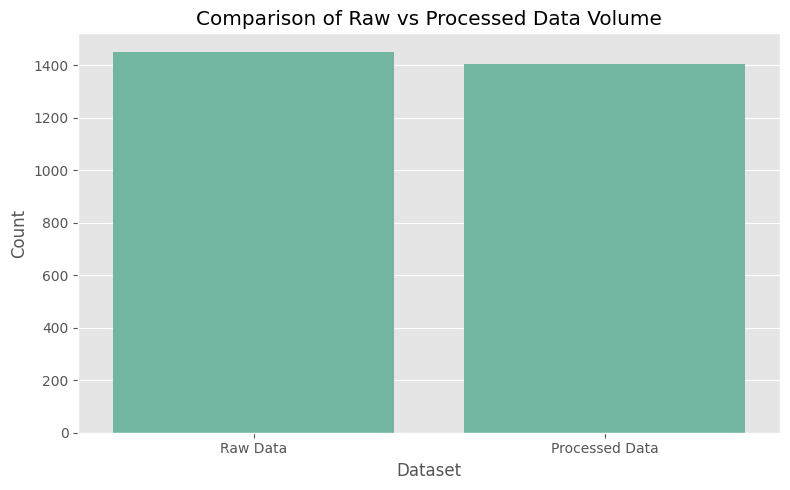


🔍 Impact of Preprocessing:

Missing Values After Preprocessing:


,Missing Values,Percentage
review_id,0,0.000000
review_text,2,0.142146
rating,0,0.000000
date,0,0.000000
bank,0,0.000000
source,0,0.000000



Duplicates After Preprocessing: 0 (0.00%)

Date Format After Preprocessing:


0    2024-02-18
1    2024-04-15
2    2024-05-03
3    2025-05-21
4    2025-06-03
Name: date, dtype: object

In [88]:
# Load the processed data
try:
    proc_data = pd.read_csv("../data/processed/bank_reviews_processed.csv")
    print(f"\n📊 Loaded {len(proc_data)} processed reviews")
    
    # Display sample of processed data
    print("\n📋 Processed Data Sample:")
    display(proc_data.head())
    
    # Compare raw vs processed data counts
    if not raw_data.empty:
        raw_count = len(raw_data)
        proc_count = len(proc_data)
        diff = raw_count - proc_count
        
        print(f"\n📊 Data Reduction Summary:")
        print(f"Original reviews: {raw_count}")
        print(f"Processed reviews: {proc_count}")
        print(f"Reduction: {diff} reviews ({diff/raw_count*100:.2f}%)")
        
        # Create comparison dataframe
        compare_df = pd.DataFrame({
            'Dataset': ['Raw Data', 'Processed Data'],
            'Count': [raw_count, proc_count]
        })
        
        plt.figure(figsize=(8, 5))
        sns.barplot(x='Dataset', y='Count', data=compare_df)
        plt.title('Comparison of Raw vs Processed Data Volume')
        plt.tight_layout()
        plt.show()
    
    # Examine issues resolved by preprocessing
    print("\n🔍 Impact of Preprocessing:")
    
    # 1. Missing values resolved
    missing_proc = proc_data.isnull().sum()
    missing_proc_pct = (missing_proc / len(proc_data)) * 100
    
    print("\nMissing Values After Preprocessing:")
    display(pd.DataFrame({
        'Missing Values': missing_proc,
        'Percentage': missing_proc_pct
    }))
    
    # 2. Duplicates resolved
    duplicates_proc = proc_data.duplicated().sum()
    print(f"\nDuplicates After Preprocessing: {duplicates_proc} ({duplicates_proc/len(proc_data)*100:.2f}%)")
    
    # 3. Date normalization
    print("\nDate Format After Preprocessing:")
    display(proc_data['date'].head())
    
except Exception as e:
    print(f"❌ Error loading processed data: {str(e)}")

## 🏁 Conclusion

In [ ]:
print("\n🏁 Analysis Complete!")
print("""
Key Findings:
- Successfully scraped and processed reviews for Ethiopian mobile banking apps
- Analyzed distribution of ratings and review content across banks
- Identified and addressed data quality issues through preprocessing
- Prepared clean dataset ready for further analysis or sentiment analysis
""")


🏁 Analysis Complete!

Key Findings:
- Successfully scraped and processed reviews for Ethiopian mobile banking apps
- Analyzed distribution of ratings and review content across banks
- Identified and addressed data quality issues through preprocessing
- Prepared clean dataset ready for further analysis or sentiment analysis

